In [1]:
import markovianbandit as bandit
import pandas as pd
import matplotlib.pyplot as plt
import pickle

In [2]:
try:
    with open('benchmarks/indexables_kka.pickle', 'rb') as f:
        indexables = pickle.load(f)
except Exception as e:
    print(e)
    indexables = dict([])
#indexables = dict([]) # uncomment to erase all computed valued
print(indexables)

{(3, 'dense'): 100.0, (3, ('ndiag', 1)): 98.8, (3, ('ndiag', 2)): 99.8, (3, ('ndiag', 3)): 99.9, (3, ('ndiag-unif', 1)): 99.4, (3, ('ndiag-unif', 2)): 100.0, (3, ('ndiag-unif', 3)): 100.0, (4, 'dense'): 100.0, (4, ('ndiag', 1)): 94.7, (4, ('ndiag', 2)): 99.9, (4, ('ndiag', 3)): 100.0, (4, ('ndiag-unif', 1)): 97.9, (4, ('ndiag-unif', 2)): 100.0, (4, ('ndiag-unif', 3)): 100.0, (5, 'dense'): 100.0, (5, ('ndiag', 1)): 87.5, (5, ('ndiag', 2)): 98.9, (5, ('ndiag', 3)): 100.0, (5, ('ndiag-unif', 1)): 94.9, (5, ('ndiag-unif', 2)): 100.0, (5, ('ndiag-unif', 3)): 100.0, (10, 'dense'): 100.0, (10, ('ndiag', 1)): 52.8, (10, ('ndiag', 2)): 90.1, (10, ('ndiag', 3)): 98.8, (10, ('ndiag-unif', 1)): 67.8, (10, ('ndiag-unif', 2)): 98.4, (10, ('ndiag-unif', 3)): 100.0, (20, 'dense'): 100.0, (20, ('ndiag', 1)): 19.3, (20, ('ndiag', 2)): 56.7, (20, ('ndiag', 3)): 86.8, (20, ('ndiag-unif', 1)): 25.6, (20, ('ndiag-unif', 2)): 80.2, (20, ('ndiag-unif', 3)): 98.1, (30, 'dense'): 100.0, (30, ('ndiag', 1)): 8.2,

In [4]:
model_types = ['dense', ('ndiag', 1), ('ndiag', 2), ('ndiag', 3)]
number_tests = 100000
for dim in [3, 4, 5, 10, 20, 30, 40, 50]:
    for model_type in model_types:
        if (dim, model_type) not in indexables:
            print(dim, model_type)
            if len(model_type) == 2 and 2*(model_type[1])+1 > dim:
                continue
            number_of_indexables = 0
            for i in range(number_tests):
                model = bandit.random_restless(dim, model_type)
                number_of_indexables += model.is_indexable()
            indexables[(dim, model_type)] = number_of_indexables
    with open('benchmarks/indexables_kka.pickle', 'wb') as f:
        pickle.dump(indexables, f, pickle.HIGHEST_PROTOCOL)

In [3]:
df = pd.Series(indexables).unstack()
N = df.index.to_numpy()
values = df.to_numpy()
df

/Users/gast/opt/anaconda3/lib/python3.8/site-packages/pandas/core/dtypes/cast.py:1302: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  v = np.array(v, copy=False)


(ndiag, 1)  (ndiag, 2)  (ndiag, 3)  (ndiag-unif, 1)  (ndiag-unif, 2)  \
3         98.8        99.8        99.9             99.4            100.0   
4         94.7        99.9       100.0             97.9            100.0   
5         87.5        98.9       100.0             94.9            100.0   
10        52.8        90.1        98.8             67.8             98.4   
20        19.3        56.7        86.8             25.6             80.2   
30         8.2        29.3        69.9             11.1             57.0   
40         3.6        16.4        46.9              5.5             36.2   
50         1.5        10.5        33.0              3.2             26.4   

    (ndiag-unif, 3)  dense  
3             100.0  100.0  
4             100.0  100.0  
5             100.0  100.0  
10            100.0  100.0  
20             98.1  100.0  
30             91.2  100.0  
40             79.7  100.0  
50             71.2  100.0

In [5]:
import seaborn as sns
sns.set(context='notebook', style='darkgrid', palette='bright', font='sans-serif', font_scale=1.5, color_codes=True)

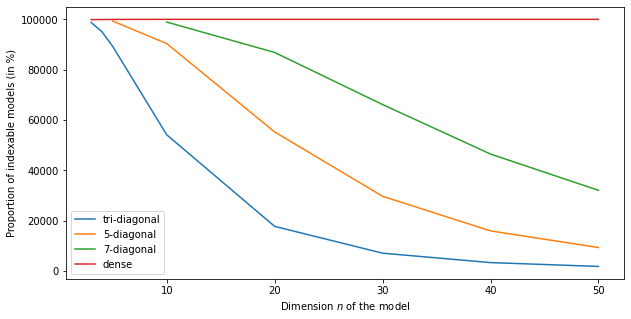

In [4]:
plt.figure(figsize=(10,5))
plt.plot(N, values[:,0], label='tri-diagonal')
plt.plot(N, values[:,1], label='5-diagonal')
plt.plot(N, values[:,2], label='7-diagonal')
plt.plot(N, values[:,3], label='dense')
plt.xlabel('Dimension $n$ of the model')
plt.ylabel('Proportion of indexable models (in %)')
plt.legend()
#plt.savefig('../figures/proportions.pdf', bbox_inches='tight')

In [5]:
print(df.to_latex())

\begin{tabular}{lrrrr}
\toprule
{} &  (ndiag, 1) &  (ndiag, 2) &  (ndiag, 3) &     dense \\
\midrule
3  &     98731.0 &         NaN &         NaN &   99883.0 \\
4  &     95067.0 &         NaN &         NaN &   99931.0 \\
5  &     89198.0 &     99309.0 &         NaN &   99969.0 \\
10 &     54129.0 &     90377.0 &     98914.0 &  100000.0 \\
20 &     17749.0 &     55267.0 &     86845.0 &  100000.0 \\
30 &      7094.0 &     29699.0 &     66143.0 &  100000.0 \\
40 &      3356.0 &     15949.0 &     46478.0 &  100000.0 \\
50 &      1823.0 &      9332.0 &     32069.0 &  100000.0 \\
\bottomrule
\end{tabular}



# other tests

In [3]:
def number_of_indexable(model_type, dim, number_tests, verbose=False):
    if verbose:
        print(model_type, dim)
    number_of_indexables = 0
    number_of_strongly_indexables = 0
    for i in range(number_tests):
        if verbose and i % 1000 == 0:
            print('\r', number_of_indexables, '/', i, end=' ')
        model = bandit.random_restless(dim, model_type)
        number_of_indexables += model.is_indexable()
        number_of_strongly_indexables += model.is_strongly_indexable()
    print('')
    return number_of_strongly_indexables, number_of_indexables
    


In [4]:
print(number_of_indexable(('ndiag', 3), 4, 10000, verbose=True))
print(number_of_indexable(('ndiag', 3), 5, 10000, verbose=True))
print(number_of_indexable(('ndiag', 2), 4, 10000, verbose=True))


('ndiag', 3) 4
 8992 / 9000 
(9824, 9990)
('ndiag', 3) 5
 8993 / 9000 
(9760, 9990)
('ndiag', 2) 4
 8965 / 9000 
(9492, 9962)


In [8]:
for dim in [3, 4, 5, 10, 20, 30]:
    print(number_of_indexable(('ndiag', 1), dim, 10000, verbose=True))


('ndiag', 1) 3
 8896 / 9000 
(9189, 9880)
('ndiag', 1) 4
 8557 / 9000 
(7358, 9519)
('ndiag', 1) 5
 8007 / 9000 
(5298, 8914)
('ndiag', 1) 10
 4925 / 9000 
(466, 5487)
('ndiag', 1) 20
 1642 / 9000 
(0, 1833)
('ndiag', 1) 30
 653 / 9000 
(0, 728)


In [9]:
for dim in [3, 4, 5, 10, 20, 30]:
    print(number_of_indexable('dense', dim, 10000, verbose=True))


dense 3
 8986 / 9000 
(9830, 9986)
dense 4
 8993 / 9000 
(9845, 9992)
dense 5
 8998 / 9000 
(9911, 9998)
dense 10
 9000 / 9000 
(10000, 10000)
dense 20
 9000 / 9000 
(10000, 10000)
dense 30
 9000 / 9000 
(10000, 10000)
